<a href="https://colab.research.google.com/github/wjh818/Data_hwj/blob/main/Machine_Learning/2_%EC%84%A0%ED%98%95_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Model

In [1]:
!pip install mglearn

     |████████████████████████████████| 542kB 8.4MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=8ae02b50dcd09a5d37f5332d2df706fe530feb2bf0b45d2bef375ad9007ecbf8
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [2]:
import mglearn
import numpy as np

w[0]: 0.393906  b: -0.031804


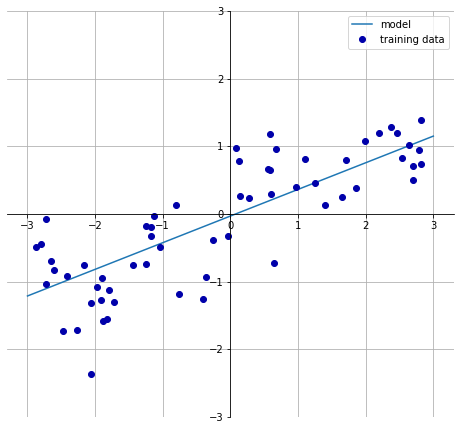

In [3]:
mglearn.plots.plot_linear_regression_wave()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X,y = mglearn.datasets.make_wave(n_samples=60)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [5]:
X_train.shape, y_train.shape

((45, 1), (45,))

In [6]:
# 선형 회귀 모델이 학습한 가중치와 편향 보기
print("lr의 가중치(weight) : {}".format(lr.coef_))
print("lr의 편향(bias) : {}".format(lr.intercept_))

lr의 가중치(weight) : [0.39390555]
lr의 편향(bias) : -0.031804343026759746


In [7]:
# 훈련 세트와 데스트 세트 점수 확인
print("훈련 세트 점수 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수 : 0.67
테스트 세트 점수 : 0.66


데이터의 특성이 많다면 어떻게 될까?

In [8]:
# 확장된 boston 주택 가격 데이터섹 불러오기
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print("훈련 세트 점수 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.61


In [9]:
X_train.shape

(379, 104)

## 가중치 패널티($\alpha$)
$\alpha$란 가중치를 억제하는 힘이라고 생각하면 편하다. 즉, $\alpha$가 커질수록 가중치 $w$는 0에 가깝게 작아진다.

  - Ridge 모델
    - $\alpha$가 커지면 가중치($w$)가 0에 가깝게 작아지지만, 실제 0이 되진 않는다.
  - Lasso 모델
    - $\alpha$가 커지면 가중치($w$)가 0에 가까워지고, 실제 0이 되어버린다.
    - 이러한 특징을 **모델에 의한 특성 선택**이라고 한다.

In [10]:
# 사용할 데이터셋: 확장된 보스턴 주택가격 데이터셋 사용

# 릿지 확인하기
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)

print("훈련 세트의 점수 : {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트의 점수 : {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트의 점수 : 0.89
테스트 세트의 점수 : 0.75


In [11]:
ridge

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [13]:
# alpha 값에 따른 릿지 모델의 성능 확인

# alpha를 10으로 설정한 경우
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

print("alpha = 10일 때의 훈련 세트의 점수 : {:.2f}".format(ridge10.score(X_train, y_train)))
print("alpha = 10일 때의 테스트 세트의 점수 : {:.2f}".format(ridge10.score(X_test, y_test)))

alpha = 10일 때의 훈련 세트의 점수 : 0.79
alpha = 10일 때의 테스트 세트의 점수 : 0.64


In [14]:
# alpha를 10으로 설정한 경우
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

print("alpha = 0.1일 때의 훈련 세트의 점수 : {:.2f}".format(ridge01.score(X_train, y_train)))
print("alpha = 0.1일 때의 테스트 세트의 점수 : {:.2f}".format(ridge01.score(X_test, y_test)))

alpha = 0.1일 때의 훈련 세트의 점수 : 0.93
alpha = 0.1일 때의 테스트 세트의 점수 : 0.77


In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

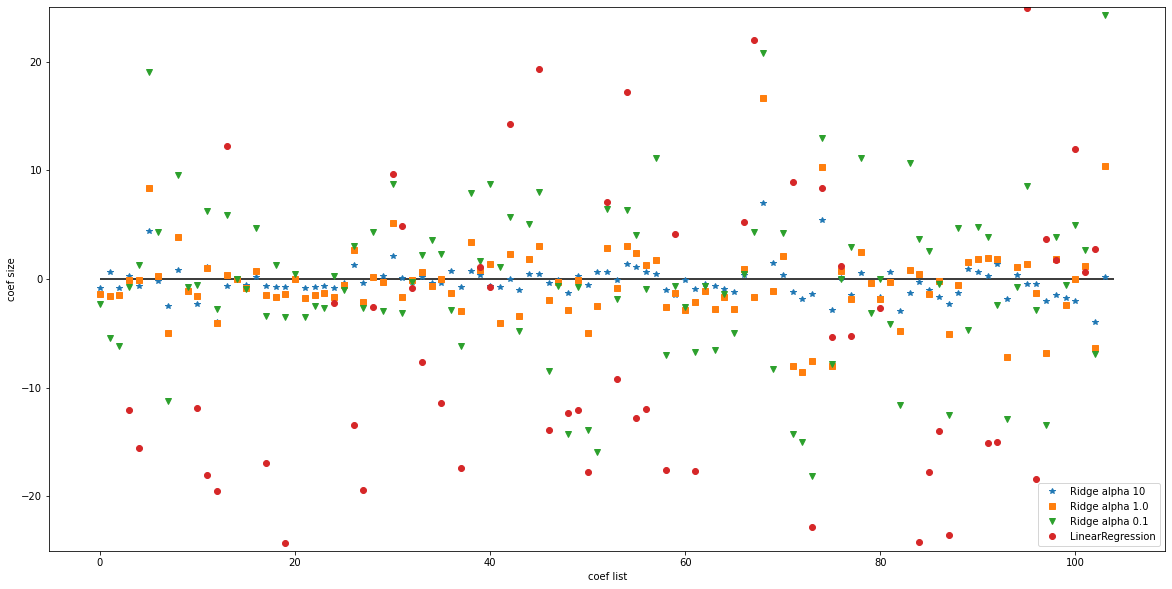

In [17]:
# alpha 값에 따른 각각 특성에 대한 가중치의 분포도를 확인해 보자
# 선형 모델의 coef_ 변수에 가중치 배열이 들어있음

plt.figure(figsize=(20, 10))

plt.plot(ridge10.coef_, '*', label="Ridge alpha 10")
plt.plot(ridge.coef_, 's', label="Ridge alpha 1.0")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha 0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")

plt.xlabel("coef list")
plt.ylabel("coef size")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()
plt.show()

In [18]:
# Lasso
# (결과를 보면 과소적합인 것을 알 수 있음)
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)

print("훈련 세트의 점수 : {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트의 점수 : {:.2f}".format(lasso.score(X_test, y_test)))

훈련 세트의 점수 : 0.29
테스트 세트의 점수 : 0.21


In [19]:
lasso

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [20]:
import numpy as np

print("lasso에서 선택한 특성의 갯수 : {}".format(np.sum(lasso.coef_ != 0)))

lasso에서 선택한 특성의 갯수 : 4


In [25]:
# Lasso는 기본적으로 경사하강법을 이용해 오차를 수정한다
# max_iter는 Lasso가 수행할 경사하강법의 최대 횟수이다

lasso001 = Lasso(alpha=0.01, max_iter=1000000).fit(X_train, y_train)

print("훈련 세트의 점수 : {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트의 점수 : {:.2f}".format(lasso001.score(X_test, y_test)))
print("lasso001에서 선택한 특성의 갯수 : {}".format(np.sum(lasso001.coef_ != 0)))

훈련 세트의 점수 : 0.90
테스트 세트의 점수 : 0.77
lasso001에서 선택한 특성의 갯수 : 33


In [26]:
lasso00001 = Lasso(alpha=0.0001, max_iter=1000000).fit(X_train, y_train)

print("훈련 세트의 점수 : {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트의 점수 : {:.2f}".format(lasso00001.score(X_test, y_test)))
print("lasso001에서 선택한 특성의 갯수 : {}".format(np.sum(lasso00001.coef_ != 0)))

훈련 세트의 점수 : 0.95
테스트 세트의 점수 : 0.64
lasso001에서 선택한 특성의 갯수 : 96


이 데이터에서는 Ridge보다 Lasso가 더 성능이 좋은 것을 알 수 있음

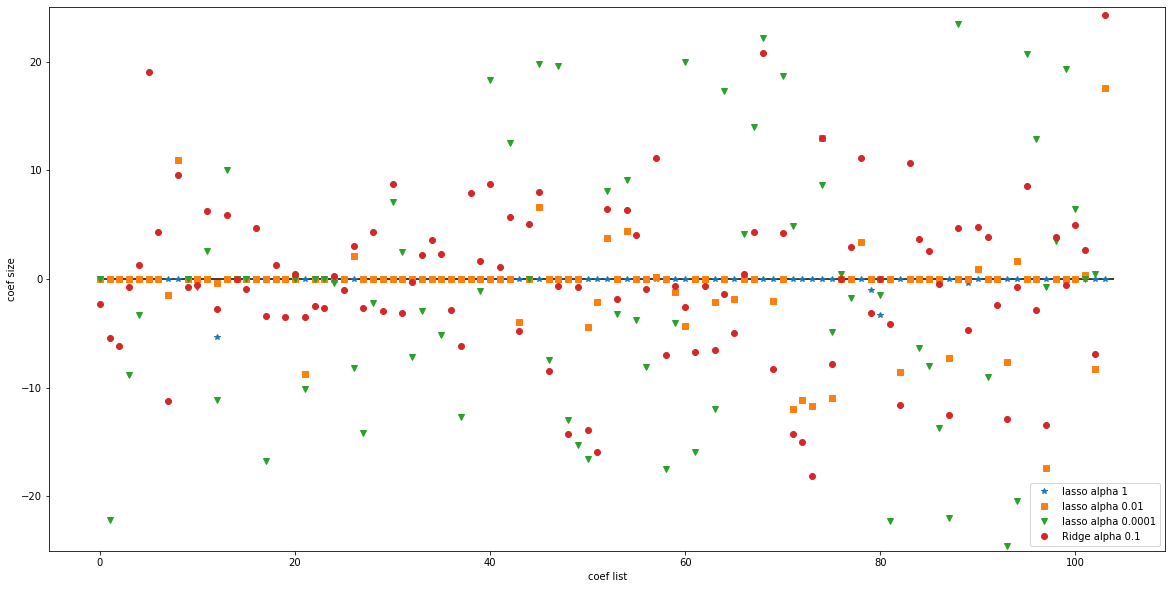

In [27]:
# Ridge는 특성들을 버리지 않고 사용
# Lasso는 특성들을 0으로 만들어 버림

plt.figure(figsize=(20, 10))

plt.plot(lasso.coef_, '*', label="lasso alpha 1")
plt.plot(lasso001.coef_, 's', label="lasso alpha 0.01")
plt.plot(lasso00001.coef_, 'v', label="lasso alpha 0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha 0.1")

plt.xlabel("coef list")
plt.ylabel("coef size")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()
plt.show()

## Linear Model Classification

$$
\hat{y}=w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b > 0
$$